In [ ]:
import pandas as pd 
import numpy as np
import os
import tensorflow as tf

import cv2
from tensorflow import keras


from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline  
import random

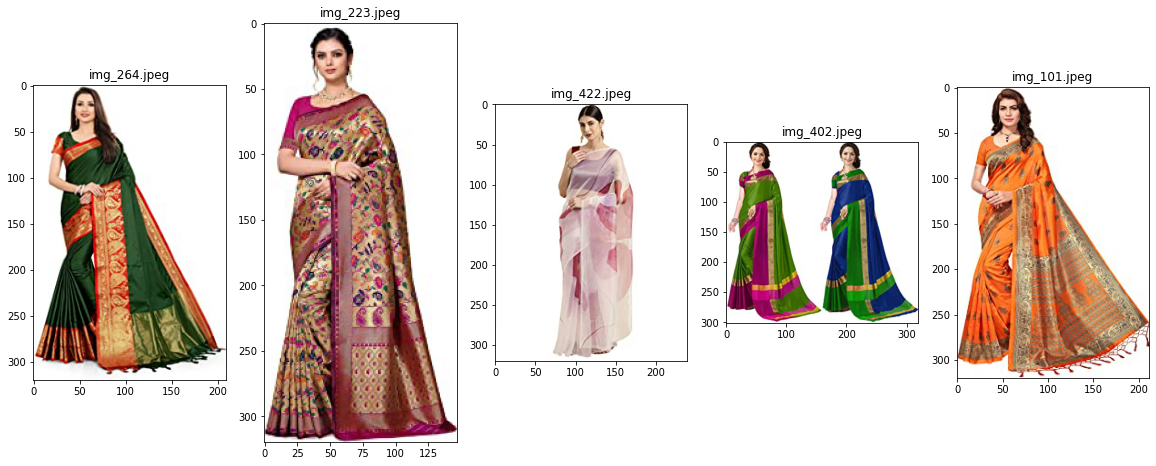

In [ ]:
plt.figure(figsize=(20,20))

test_folder = r'/content/drive/MyDrive/3images/Sarees'
for i in range(5):
  file = random.choice(os.listdir(r'/content/drive/MyDrive/3images/Sarees'))
  image_path=os.path.join(r'/content/drive/MyDrive/3images/Sarees',file)
  img=mpimg.imread(image_path)
  ax=plt.subplot(1,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

In [ ]:
from tqdm import tqdm

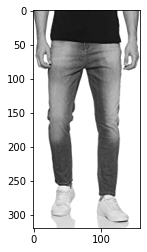

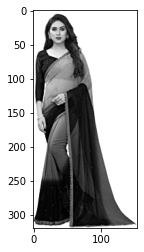

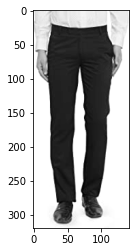

100%|██████████| 180/180 [00:00<00:00, 287.82it/s]

651


In [ ]:
DATADIR = r"/content/drive/MyDrive/3images"

CATEGORIES = ["Jeans","Sarees","Trousers"] 

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      plt.imshow(img_array, cmap='gray')
      plt.show()

      break

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, (IMG_SIZE ,IMG_SIZE))
                training_data.append([new_array,class_num])


            except Exception as e:
              pass

create_training_data()
print(len(training_data))

   
    


In [ ]:
print(img_array)

[[255 247 223 ... 235 243 255]
 [255 246 222 ... 234 240 255]
 [255 249 224 ... 233 237 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
print(img_array.shape)

(320, 141)


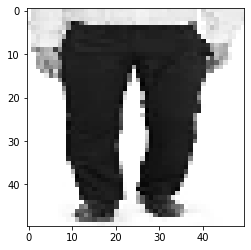

In [ ]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

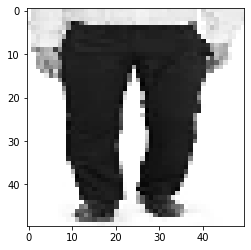

In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
2
1
2
1
0
1
0
0
2


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [253]
   [252]
   ...
   [255]
   [255]
   [255]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:

X = X/255.0
y = np.array(y)

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )
model.fit(X, y, 
          batch_size=32,
          epochs=3,
          validation_split=0.3)

Epoch 1/3
15/15 [==============================] - 24s 2s/step - loss: 0.9517 - accuracy: 0.2704 - val_loss: 0.4034 - val_accuracy: 0.3010
Epoch 2/3
15/15 [==============================] - 23s 2s/step - loss: 0.4302 - accuracy: 0.3400 - val_loss: 0.4071 - val_accuracy: 0.3010
Epoch 3/3
15/15 [==============================] - 23s 2s/step - loss: 0.3881 - accuracy: 0.3088 - val_loss: 0.3874 - val_accuracy: 0.3010


In [ ]:
import time

X = X/255.0


dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3,3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('elu'))
            
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
            model.fit(X,y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])
               

3-conv-64-nodes-0-dense-1609770457
Epoch 1/10
15/15 [==============================] - 3s 186ms/step - loss: 0.6450 - accuracy: 0.3069 - val_loss: 0.3848 - val_accuracy: 0.3010
Epoch 2/10
15/15 [==============================] - 3s 169ms/step - loss: 0.4169 - accuracy: 0.3416 - val_loss: 0.3822 - val_accuracy: 0.3010
Epoch 3/10
15/15 [==============================] - 3s 169ms/step - loss: 0.4451 - accuracy: 0.3371 - val_loss: 0.3922 - val_accuracy: 0.3010
Epoch 4/10
15/15 [==============================] - 3s 171ms/step - loss: 0.4025 - accuracy: 0.3273 - val_loss: 0.3832 - val_accuracy: 0.3010
Epoch 5/10
15/15 [==============================] - 3s 171ms/step - loss: 0.4697 - accuracy: 0.3156 - val_loss: 0.3943 - val_accuracy: 0.3010
Epoch 6/10
15/15 [==============================] - 2s 168ms/step - loss: 0.3674 - accuracy: 0.3343 - val_loss: 0.3832 - val_accuracy: 0.3010
Epoch 7/10
15/15 [==============================] - 3s 171ms/step - loss: 0.3057 - accuracy: 0.3238 - val_loss: 0

In [ ]:
def prepare(filepath):
    IMG_SIZE = 36
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [ ]:
prediction = model.predict([prepare('Trousers.jpg')])

error: ignored